In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from my_functions import *
from itertools import chain # Pradeep Elance https://www.tutorialspoint.com/append-multiple-lists-at-once-in-python
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer

In [2]:
houses_train = pd.read_csv('./datasets/train.csv')
houses_test = pd.read_csv('./datasets/test.csv')

## Exploring the Data

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
houses_train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [4]:
houses_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


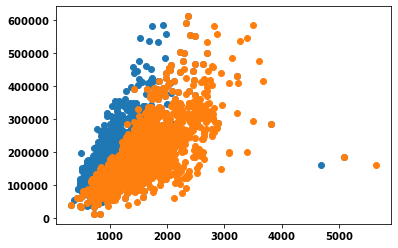

In [5]:
plt.scatter(houses_train['1st Flr SF'], houses_train['SalePrice']);
plt.scatter(houses_train['Gr Liv Area'], houses_train['SalePrice'])

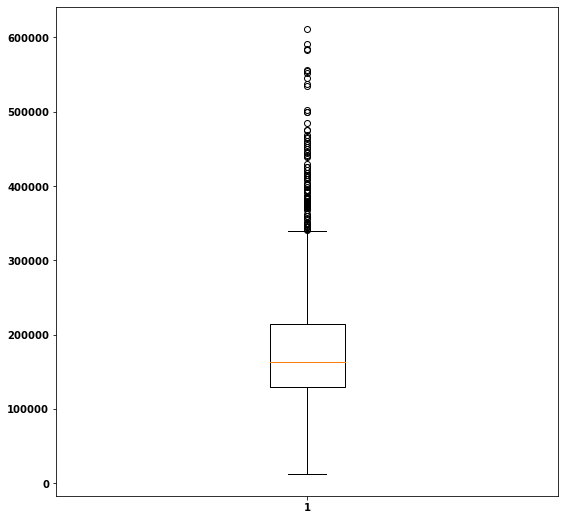

In [6]:
plt.figure(figsize=(9, 9))
plt.boxplot(houses_train['SalePrice']);

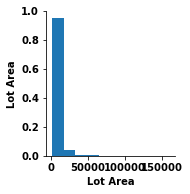

In [7]:
sns.pairplot(houses_train[['Lot Area', ]])

### Choosing Features

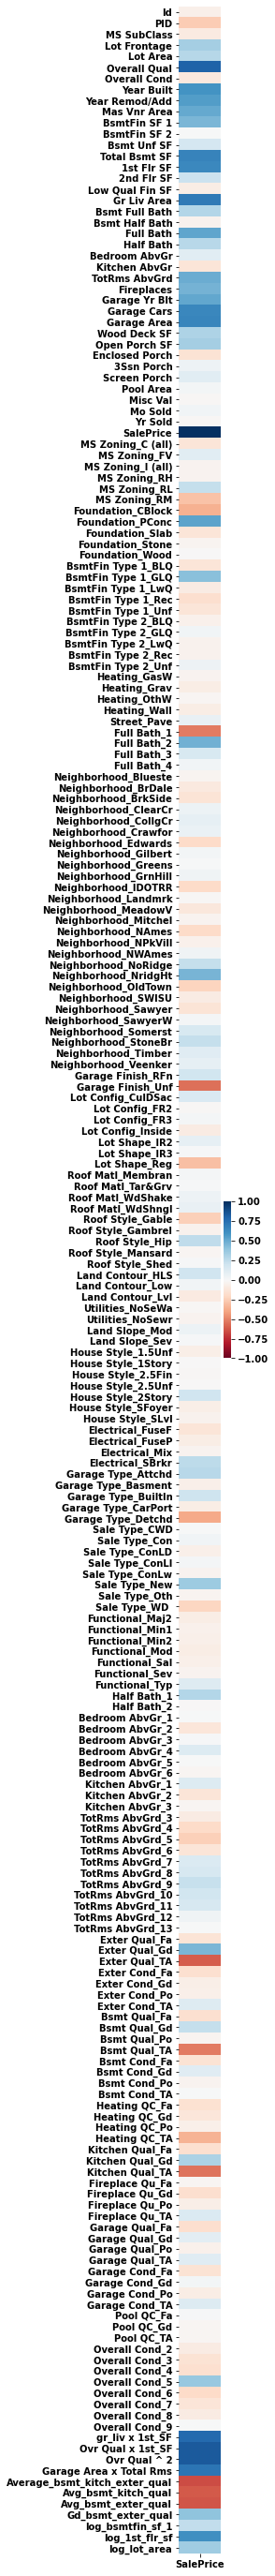

In [19]:
plt.figure(figsize=(1, 50))
sns.heatmap(houses_train.corr()[['SalePrice']], vmin=-1, vmax=1, cmap='RdBu');

In [20]:
# random_feature_thresh_test(houses_train, 'SalePrice', features_all, 1.5)

In [85]:
# mean_corr = houses_train.corr()['SalePrice'].mean()
features_all = get_features(houses_train, 1)
len(features_all)

42

## Prepping model for Kaggle Submission

In [87]:
# Garage Cars was type int64 in houses_test, was type float in houses_train_pol_scale
houses_test['Garage Cars'] = houses_test['Garage Cars'].apply(lambda x: float(x))

In [88]:
# Thanks Will Badr for this! https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779
imp_data(houses_test)

In [89]:
# ordinal_qual_cond_categories = ['Exter Qual',
#                                 'Exter Cond',
#                                 'Bsmt Qual',
#                                 'Bsmt Cond',
#                                 'Heating QC',
#                                 'Kitchen Qual',
#                                 'Fireplace Qu',
#                                 'Garage Qual',
#                                 'Garage Cond',
#                                 'Pool QC']

# for col in ordinal_qual_cond_categories:
#     houses_test[col] = houses_test[col].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

In [90]:
category_to_bool_cols(houses_test, nominal_categories)

In [103]:
poly_features(houses_test)

In [104]:
log_col(houses_test, columns_to_log)

In [105]:
houses_test.shape

(878, 258)

In [106]:
X_real_test = houses_test[[col for col in features_all if col in houses_test]]
X_real_test.shape

(878, 42)

## Testing!!

### Splitting the Data

In [107]:
outlier_indices = [1796, 125]
X_all = houses_train[[col for col in features_all if col in houses_test]].drop(outlier_indices)
y_all = houses_train['SalePrice'].drop(outlier_indices)
X_all.shape

(2032, 42)

In [108]:
X_all.fillna(0, inplace=True)

In [109]:
X_train, X_test, y_train, y_test = get_cval_score_mse(X_all, y_all)

The Cross Validation Score is: [0.90278687 0.90314103 0.92086078 0.92411202 0.90568431]
The R2 score on testing data is: 0.9140444201410287
The MSE is 20811.264383602083


In [110]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [111]:
cross_val_score(lr, X_train, y_train)

array([0.90278687, 0.90314103, 0.92086078, 0.92411202, 0.90568431])

In [112]:
y_pred = lr.predict(X_test)

In [113]:
lr.score(X_test, y_test)

0.9140444201410287

In [114]:
metrics.mean_squared_error(y_test, y_pred, squared=False)

20811.264383602083

In [115]:
resids = y_test - y_pred

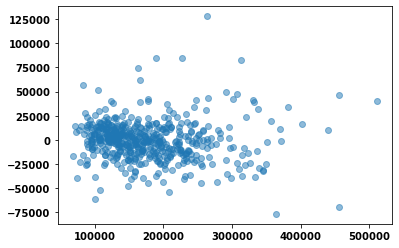

In [116]:
plt.scatter(y_pred, resids, alpha=0.5)

In [117]:
X_all.shape

(2032, 42)

## Training model on all data

In [118]:
lr.fit(X_all, y_all)

LinearRegression()

In [119]:
len(lr.predict(X_real_test))

878

In [120]:
len(X_real_test)

878

In [121]:
houses_test['SalePrice'] = lr.predict(X_real_test)

submission = houses_test[['Id', 'SalePrice']]
submission[submission['SalePrice'] < 0]
submission.describe()

,Id,SalePrice
count,878.000000,878.000000
mean,1444.749431,180019.610180
std,850.838263,76072.790964
min,2.000000,57106.815867
25%,692.250000,127042.833316
50%,1433.000000,160661.597961
75%,2197.500000,213800.134031
max,2928.000000,632108.162278


In [381]:
submission.to_csv('./submissions/test25.csv', index=False)